# PART1

# Read and Analyse Dataset

### Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 project_path  = '/content/drive/MyDrive/AIML/projects/NLP/Project1'

In [3]:
#load the full set of the data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
blog_df = pd.read_csv("/content/drive/MyDrive/AIML/projects/NLP/Project1/blogtext.csv")

In [4]:
# check the shape of the data frame by using the shape attribute of the data frame
blog_df.shape

(681284, 7)

In [5]:
#check if the data frame is properly loaded using the sample() method
blog_df.sample(5)

,id,gender,age,topic,sign,date,text
132214,3665244,male,25,Arts,Taurus,"29,June,2004",I have completed my move. To say I am sett...
330319,3305513,male,25,Engineering,Virgo,"14,May,2004","Man, what a heart breaking lost for..."
265538,3604179,male,17,Student,Virgo,"14,July,2004",I was too tired to write the softball u...
482293,3402111,female,16,Student,Sagittarius,"20,May,2004",&nbsp; Oof... this is my last day of su...
620987,1381825,female,16,indUnk,Scorpio,"07,June,2004",urlLink Kit posted the picture of the...


In [6]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [7]:
#Taking Sample of 5000 records to avoid session crash in google colab.
# Google Colab is crashing so we have to reduce the size of data
blog_df=blog_df.head(5000)

In [8]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5000 non-null   int64 
 1   gender  5000 non-null   object
 2   age     5000 non-null   int64 
 3   topic   5000 non-null   object
 4   sign    5000 non-null   object
 5   date    5000 non-null   object
 6   text    5000 non-null   object
dtypes: int64(2), object(5)
memory usage: 273.6+ KB


In [9]:
blog_df.gender.value_counts()

male      3294
female    1706
Name: gender, dtype: int64

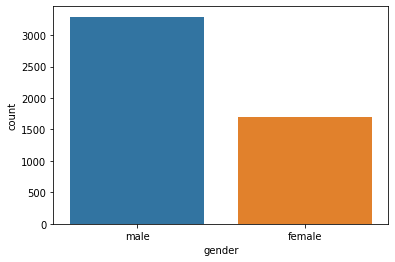

In [10]:
import seaborn as sns
sns.countplot(x='gender',data=blog_df)

**Male blogs are more than female blogs**

In [11]:
blog_df['sign'].value_counts()

Aries          2483
Sagittarius     704
Libra           414
Scorpio         408
Aquarius        329
Leo             190
Taurus          100
Cancer           94
Gemini           86
Capricorn        84
Pisces           67
Virgo            41
Name: sign, dtype: int64

**Aries Sign count is more in the sample data**

In [12]:
blog_df['topic'].value_counts()

Technology              2332
indUnk                  1381
Student                  569
Engineering              119
Education                118
BusinessServices          87
Sports-Recreation         75
InvestmentBanking         70
Communications-Media      61
Non-Profit                47
Science                   33
Arts                      31
Internet                  20
Banking                   16
Consulting                16
Automotive                14
Religion                   4
Law                        3
Accounting                 2
Museums-Libraries          2
Name: topic, dtype: int64

**Topic Technology count is more in sample data.**

# Clean the Structured Data

In [14]:
#check for na values
blog_df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [15]:
blog_df.drop(['id','date'],axis= 1,inplace = True)

In [17]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  5000 non-null   object
 1   age     5000 non-null   int64 
 2   topic   5000 non-null   object
 3   sign    5000 non-null   object
 4   text    5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


# Preprocess unstructured data to make it consumable for model training

- Eliminate All special Characters and Numbers 
- Lowercase all textual data 
- Remove all Stopwords
- Remove all extra white spaces

In [18]:
#Lets check those symbols in the row which we saw earlier
blog_df['text'][42]

"             Over the last few weeks I've been to a couple of Western movies ( urlLink Troy  and  urlLink Spiderman 2 ) and a few Korean ones as well:  urlLink 여친소 (Yeochinso/Windstruck) ;  urlLink 올드보이 (Old Boy) ;  urlLink 공공의적 (Gong-gong-ui Jock/Public Enemy ;  urlLink 와일드카드 (Wild Card) ; and  urlLink 범죄의 재구성 (Beomjwi-ui Jaegooseong/The Big Swindle) . I really liked all of the Korean movies (actually the Western ones seemed pretty predictable compared to the Korean fare) but found it interesting that 4 of the 5 (all but Old Boy) were cop movies. (To be fair, in The Big Swindle it was more about the robbers than the cops--still, the theme was intact.) Maybe this is typical to movies in general (going in phases, all of the movies are from the last year) or maybe it's just how (again) in Korea things are very much fads; where once a theme gets started it's difficult to stop it.    urlLink     Public Enemy, WildCard, The Big Swindle and Old Boy    With that in mind, I think of my night 

### Eliminate All special Characters and Numbers

In [20]:
import re
blog_df.text = blog_df.text.apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))

In [21]:
#Lets check those symbols in the row which we saw earlier
blog_df['text'][42]

' Over the last few weeks I ve been to a couple of Western movies urlLink Troy and urlLink Spiderman and a few Korean ones as well urlLink Yeochinso Windstruck urlLink Old Boy urlLink Gong gong ui Jock Public Enemy urlLink Wild Card and urlLink Beomjwi ui Jaegooseong The Big Swindle I really liked all of the Korean movies actually the Western ones seemed pretty predictable compared to the Korean fare but found it interesting that of the all but Old Boy were cop movies To be fair in The Big Swindle it was more about the robbers than the cops still the theme was intact Maybe this is typical to movies in general going in phases all of the movies are from the last year or maybe it s just how again in Korea things are very much fads where once a theme gets started it s difficult to stop it urlLink Public Enemy WildCard The Big Swindle and Old Boy With that in mind I think of my night out on Saturday A group of friends and I had dinner and a movie in the urlLink Dongdaemoon area then headed 

### Lower Case all textual data

In [22]:
# Convert text to lowercase
blog_df.text = blog_df.text.apply(lambda x: x.lower())

In [23]:
#Lets check those symbols in the row which we saw earlier
blog_df['text'][42]

' over the last few weeks i ve been to a couple of western movies urllink troy and urllink spiderman and a few korean ones as well urllink yeochinso windstruck urllink old boy urllink gong gong ui jock public enemy urllink wild card and urllink beomjwi ui jaegooseong the big swindle i really liked all of the korean movies actually the western ones seemed pretty predictable compared to the korean fare but found it interesting that of the all but old boy were cop movies to be fair in the big swindle it was more about the robbers than the cops still the theme was intact maybe this is typical to movies in general going in phases all of the movies are from the last year or maybe it s just how again in korea things are very much fads where once a theme gets started it s difficult to stop it urllink public enemy wildcard the big swindle and old boy with that in mind i think of my night out on saturday a group of friends and i had dinner and a movie in the urllink dongdaemoon area then headed 

### Remove all stopwards

In [24]:
import numpy as np
import nltk
# importing stopwords list
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [26]:
# Remove stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
blog_df.text = blog_df.text.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [28]:
#Lets check those symbols in the row which we saw earlier
blog_df['text'][42]

'last weeks couple western movies urllink troy urllink spiderman korean ones well urllink yeochinso windstruck urllink old boy urllink gong gong ui jock public enemy urllink wild card urllink beomjwi ui jaegooseong big swindle really liked korean movies actually western ones seemed pretty predictable compared korean fare found interesting old boy cop movies fair big swindle robbers cops still theme intact maybe typical movies general going phases movies last year maybe korea things much fads theme gets started difficult stop urllink public enemy wildcard big swindle old boy mind think night saturday group friends dinner movie urllink dongdaemoon area headed pronounced daehan ro korean spelling dae hak ro daehak means university ro street may guessed street near universities course tons bars raining typhoon town see urllink typhoon tracker page updates one way many people town however mind rain pretty warm shorts shirt cut away sneakers really quite comfortable went places finding one c

### Remove All Extra white Spaces

In [29]:
# Strip unwanted spaces
blog_df.text = blog_df.text.apply(lambda x: x.strip())


In [30]:
blog_df['text'][42]

'last weeks couple western movies urllink troy urllink spiderman korean ones well urllink yeochinso windstruck urllink old boy urllink gong gong ui jock public enemy urllink wild card urllink beomjwi ui jaegooseong big swindle really liked korean movies actually western ones seemed pretty predictable compared korean fare found interesting old boy cop movies fair big swindle robbers cops still theme intact maybe typical movies general going phases movies last year maybe korea things much fads theme gets started difficult stop urllink public enemy wildcard big swindle old boy mind think night saturday group friends dinner movie urllink dongdaemoon area headed pronounced daehan ro korean spelling dae hak ro daehak means university ro street may guessed street near universities course tons bars raining typhoon town see urllink typhoon tracker page updates one way many people town however mind rain pretty warm shorts shirt cut away sneakers really quite comfortable went places finding one c

# As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence

In [31]:
#blog_df['labels'] = blog_df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)
blog_df['labels'] = blog_df.apply(lambda row: [row['gender'], str(row['age']), row['topic'], row['sign']], axis=1)


In [32]:
blog_df.head()

,gender,age,topic,sign,text,labels
0,male,15,Student,Leo,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


# Select only required columns from your dataframe

In [33]:
blog_df = blog_df[['text','labels']]

In [34]:
blog_df.head()

,text,labels
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


# Create training and testing data

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(blog_df.text.values, blog_df.labels.values, test_size=0.20, random_state=42)

# Vectorize the data
In Machine Learning, vectorization is a step in feature extraction. The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

- **BOW** - Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can say that it is a method of feature extraction with text data. This approach is a simple and flexible way of extracting features from documents.A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

* **TF-IDF** --Term Frequency-Inverse Document Frequency. This is a metric that represents how ‘important’ a word is to a document in the document set. It has many uses, most importantly in automated text analysis, and is very useful for scoring words in machine learning algorithms for Natural Language Processing (NLP).This is a technique to quantify words in a set of documents. We generally compute a score for each word to signify its importance in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.



# Create Bag of Words
Use CountVectorizer. Most simple of all the techniques.Thus we can manipulate the features any way we want. In fact, we can also combine unigrams, bigrams, trigrams, and more, to form feature space.

Transform the training and testing data

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
# Considered unigrams and bigrams
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

### Have a look at some feature names

In [37]:
vectorizer.get_feature_names()[:5]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa', 'aa amazing', 'aa compared', 'aa nice', 'aaa']

# View term-document matrix

In [38]:
X_train_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Create a dictionary to get label counts

In [39]:
label_counts = dict()

for labels in blog_df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

# Print the dictionary

In [40]:
label_counts

{'14': 170,
 '15': 339,
 '16': 67,
 '17': 331,
 '23': 137,
 '24': 353,
 '25': 268,
 '26': 96,
 '27': 86,
 '33': 101,
 '34': 540,
 '35': 2307,
 '36': 60,
 '37': 19,
 '39': 79,
 '41': 14,
 '42': 9,
 '44': 3,
 '45': 14,
 '46': 7,
 'Accounting': 2,
 'Aquarius': 329,
 'Aries': 2483,
 'Arts': 31,
 'Automotive': 14,
 'Banking': 16,
 'BusinessServices': 87,
 'Cancer': 94,
 'Capricorn': 84,
 'Communications-Media': 61,
 'Consulting': 16,
 'Education': 118,
 'Engineering': 119,
 'Gemini': 86,
 'Internet': 20,
 'InvestmentBanking': 70,
 'Law': 3,
 'Leo': 190,
 'Libra': 414,
 'Museums-Libraries': 2,
 'Non-Profit': 47,
 'Pisces': 67,
 'Religion': 4,
 'Sagittarius': 704,
 'Science': 33,
 'Scorpio': 408,
 'Sports-Recreation': 75,
 'Student': 569,
 'Taurus': 100,
 'Technology': 2332,
 'Virgo': 41,
 'female': 1706,
 'indUnk': 1381,
 'male': 3294}

# Multi label binarizer
Load a multilabel binarizer and fit it on the labels.

In [41]:
from sklearn.preprocessing import MultiLabelBinarizer

In [42]:
mlb = MultiLabelBinarizer(classes=sorted(label_counts.keys()))
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)

# Build a base model for Supervised Learning - Classification

Use a linear classifier of your choice, wrap it up in OneVsRestClassifier to train it on every label.

In [43]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(solver='lbfgs')
clf = OneVsRestClassifier(clf)

### Fit the classifier

In [44]:
clf.fit(X_train_bow, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

# Make predictions
Get predicted labels and scores

In [45]:
predicted_labels = clf.predict(X_test_bow)
predicted_scores = clf.decision_function(X_test_bow)

# Get inverse transform for predicted labels and test labels

In [46]:
pred_inversed = mlb.inverse_transform(predicted_labels)
y_test_inversed = mlb.inverse_transform(y_test)

# Print some samples

In [47]:
for i in range(10):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test[i],
        ','.join(y_test_inversed[i]),
        ','.join(pred_inversed[i])
    ))

Title:	beautiful
True labels:	35,Aries,Technology,male
Predicted labels:	35,Aries,Technology,male


Title:	good idea johnathan quite tasty
True labels:	35,Aries,Technology,male
Predicted labels:	35,Aries,Technology,male


Title:	house right
True labels:	35,Aries,Technology,male
Predicted labels:	35,Aries,Technology,male


Title:	sorry im person could wouldnt bad already went harry today went sledding quiet awhile ran tom scott went sledding got cold hungry decided head back goofed ate dinner realized needed along time ago way one stuck depressed time odd one whole vegetarian scheme normal like every ska bunctious kid maybe wouldnt problem thats problem im deep thought im going go listen early november think stuff nights long hope never come
True labels:	15,Libra,Student,female
Predicted labels:	female


Title:	baby named bo jangles born parents told blind bo blind doctors foreign believed blind really light colored eyes growing tryed convince parents wasnt blind would never listen star

# Calculate accuracy


- **Accuracy** :  is the fraction of predictions our model got right.
- **Precision**: Out of all the classes, precision is how much we predicted correctly.Precision should be as high as possible.
- **Recall**: Out of all the positive classes, recall is how much we predicted correctly. It is also called sensitivity or true positive rate (TPR).Recall should be as high as possible.
- **F-1 Score** - It is often convenient to combine precision and recall into a single metric called the F-1 score.The classifier will only get a high F-1 score if both recall and precision are high.

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores(y_val, predicted):
    print('Accuracy score: ', accuracy_score(y_val, predicted))
    print('F1 score: ', f1_score(y_val, predicted, average='micro'))
    print('Average precision score: ', average_precision_score(y_val, predicted, average='micro'))
    print('Average recall score: ', recall_score(y_val, predicted, average='micro'))

In [49]:
print('Bag-of-words')
print_evaluation_scores(y_test, predicted_labels)

Bag-of-words
Accuracy score:  0.497
F1 score:  0.7208410285551924
Average precision score:  0.5565734251032868
Average recall score:  0.63425


# Build Model

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


def build_model_train(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    elif model=='knn':
        model = KNeighborsClassifier(n_neighbors=2,
                                             algorithm='auto')

        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    elif model=='adaboost':
        model = AdaBoostClassifier()
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    elif model=='rf':
        model = RandomForestClassifier(n_estimators=2,
        min_samples_split= 2,
        min_samples_leaf=1,
        max_features= 'sqrt',
        max_depth= 2,
        criterion= 'gini',
        bootstrap= False)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='dt':
        model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

        
    return model

In [51]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

models = ['lr','svm','nbayes','rf','knn','adaboost','dt']

for model in models:
    model = build_model_train(X_train_bow, y_train,model=model)
    model.fit(X_train_bow, y_train)
    Ypred=model.predict(X_test_bow)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    
    print_evaluation_scores(y_test, Ypred)
  
    



**displaying  metrics for the mode OneVsRestClassifier(estimator=LogisticRegression(penalty='l1',
                                                 solver='liblinear'))

Accuracy score:  0.501
F1 score:  0.7448219845674834
Average precision score:  0.5817361398156349
Average recall score:  0.68775


**displaying  metrics for the mode OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'))

Accuracy score:  0.476
F1 score:  0.7399121054734319
Average precision score:  0.5724503762810973
Average recall score:  0.6945


**displaying  metrics for the mode OneVsRestClassifier(estimator=MultinomialNB())

Accuracy score:  0.139
F1 score:  0.4978494623655914
Average precision score:  0.35362416197843416
Average recall score:  0.34725


**displaying  metrics for the mode OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     max_depth=2,
                                                     max_features='sqrt',
     

# Improve Performance of model.

### Experiment with other vectorisers

**TF-IDF** --> TF-IDF or Term Frequency–Inverse Document Frequency, is a numerical statistic that’s intended to reflect how important a word is to a document. Although it’s another frequency-based method, it’s not as naive as Bag of Words.TF-IDF is a product of two values: Term Frequency (TF) and Inverse Document Frequency (IDF).

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tf idf
tf_idf = TfidfVectorizer()
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(X_train)
#applying tf idf to training data
X_train_tf = tf_idf.transform(X_train)

In [53]:
print(X_train_tf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
#Focus on TF IDF VALUES
print(tf_idf.idf_)

[7.90800525 8.60115243 8.60115243 ... 8.60115243 8.60115243 8.60115243]


In [55]:
print("n_samples: %d, n_features: %d" % X_train_tf.shape)

n_samples: 4000, n_features: 28960


In [56]:
#transforming test data into tf-idf matrix
X_test_tf = tf_idf.transform(X_test)

In [57]:
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 1000, n_features: 28960


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

def build_model_train_New(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    elif model=='knn':
        model = KNeighborsClassifier(n_neighbors=3,
                                             algorithm='auto')

        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    elif model=='adaboost':
        model = AdaBoostClassifier()
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    elif model=='rf':
        model = RandomForestClassifier(n_estimators=10,min_samples_split= 2,min_samples_leaf=1,max_features= 'sqrt',max_depth= 1,criterion= 'gini',bootstrap= False)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    elif model=='dt':
        model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    

    return model

In [59]:
import warnings
warnings.filterwarnings('ignore')

models = ['lr','svm','nbayes','rf','knn','adaboost','dt']

for model in models:
    model = build_model_train_New(X_train_tf, y_train,model=model)
    model.fit(X_train_tf, y_train)
    Ypred1=model.predict(X_test_tf)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    
    print_evaluation_scores(y_test, Ypred1)



**displaying  metrics for the mode OneVsRestClassifier(estimator=LogisticRegression(penalty='l1',
                                                 solver='liblinear'))

Accuracy score:  0.457
F1 score:  0.6797873868697027
Average precision score:  0.5028999211977936
Average recall score:  0.5915


**displaying  metrics for the mode OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'))

Accuracy score:  0.502
F1 score:  0.7372395469165152
Average precision score:  0.5765521821408841
Average recall score:  0.659


**displaying  metrics for the mode OneVsRestClassifier(estimator=MultinomialNB())

Accuracy score:  0.156
F1 score:  0.47747262609944363
Average precision score:  0.3309371242662141
Average recall score:  0.3325


**displaying  metrics for the mode OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     max_depth=1,
                                                     max_features='sqrt',
        

# Share insights on relative performance comparison

### Which vectorizer performed better? Probable reason?.
- Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

- Bag of Words vectors are easy to interpret. However, TF-IDF usually performs better in machine learning models.

- The SVM with TF-IDF method generate the highest accuracy 50.2% compared to other methods, then LogisticRegression with Bag of words 50.1% and then last SVM with Bags of words 47% generate the highest accuracy.

- Although Bag-of-Words is quite efficient and easy to implement, still there are some disadvantages to this technique which are given below:
The model ignores the location information of the word. The location information is a piece of very important information in the text. For example  “today is off” and “Is today off”, have the exact same vector representation in the BoW model.
Bag of word models doesn’t respect the semantics of the word. For example, words ‘soccer’ and ‘football’ are often used in the same context. However, the vectors corresponding to these words are quite different in the bag of words model. The problem becomes more serious while modeling sentences. Ex: “Buy used cars” and “Purchase old automobiles” are represented by totally different vectors in the Bag-of-words model.

### Which model outperformed? Probable reason?

- The SVM with TF-IDF method generate the highest accuracy 50.2% as compared to other methods.
- SVM is outperformed well on text classification.

### Which parameter/hyperparameter significantly helped to improve performance?Probable reason?.

- Below is a list of common hyperparameters that needs tuning for getting the best fit for our data. We'll try various hyperparameters settings to various splits of train/test data to find out best fit.

- **C**- It represents regularization applied to the linear kernel function. The strength of normalization is inversely proportional to C which means that low C will result in high regularization and vice-versa. The default value of 1.0 is set.

- **penalty**- It accepts one of the two string values. It applies a penalty to linear kernel function and prevents it from overfitting data.
l1 Penalty
l2 Penalty(default)



### According to you, which performance metric should be given most importance,why?.

- According to me **Precision, Recall** should be given most importance as aims at they are measuring what proportion of actual positives was identified correctly

# PART2

# Basic Rule Based Chatbot using Chat and Reflections Library

In [60]:
import nltk
from nltk.chat.util import Chat, reflections

In [61]:
reflections

{'i': 'you',
 'i am': 'you are',
 'i was': 'you were',
 "i'd": 'you would',
 "i'll": 'you will',
 "i'm": 'you are',
 "i've": 'you have',
 'me': 'you',
 'my': 'your',
 'you': 'me',
 'you are': 'I am',
 'you were': 'I was',
 "you'll": 'I will',
 "you've": 'I have',
 'your': 'my',
 'yours': 'mine'}

In [62]:
set_pairs = [
    [
        r"my name is (.*)",
        ["Hello %1, How are you doing today ?",]
    ],
    [
        r"hi|hey|hello",
        ["Hello", "Hey there",]
    ], 
    [
        r"what is your name?",
        ["You can call me a chatbot ?",]
    ],
    [
        r"how are you ?",
        ["I am fine, thank you! How can i help you?",]
    ],
    [
        r"I am fine, thank you",
        ["great to hear that, how can i help you?",]
    ],
    [
        r"how can i help you? ",
        ["i am looking for online guides and courses to learn data science, can you suggest?", "i am looking for data science training platforms",]
    ],
    [
        r"i'm (.*) doing good",
        ["That's great to hear","How can i help you?:)",]
    ],
    [
        r"i am looking for online guides and courses to learn data science, can you suggest?",
        ["Pluralsight is a great option to learn data science. You can check their website",]
    ],
    [
        r"thanks for the suggestion. do they have great authors and instructors?",
        ["Yes, they have the world class best authors, that is their strength;)",]
    ],
    [
        r"(.*) thank you so much, that was helpful",
        ["I am happy to help", "No problem, you're welcome",]
    ],
    [
        r"quit",
    ["Bye, take care. See you soon :) ","It was nice talking to you. See you soon :)"]
],
]

In [63]:
def chatbot():
        print("Hello, I am the chatbot you built") 

chatbot()

Hello, I am the chatbot you built


In [64]:
chat = Chat(set_pairs, reflections)
print(chat)

In [66]:
chat.converse()
if __name__ == "__main__":
    chatbot()

>Hello
Hello
>what is your name?
You can call me a chatbot ?
>How are you?
I am fine, thank you! How can i help you?
>i am looking for online guides and courses to learn data science, can you suggest?
Pluralsight is a great option to learn data science. You can check their website
>quit
It was nice talking to you. See you soon :)
Hello, I am the chatbot you built


# Customer Support Chatbot using Neural Networks and NLTK

In [67]:
import nltk
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

import numpy
#import tflearn
import tensorflow
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Loading given json data file

In [68]:
import json

with open('/content/drive/MyDrive/AIML/projects/NLP/Project1/GL Bot.json') as file:
  data=json.load(file)
 

In [69]:
print(data)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of p

In [70]:
print (data['intents'])

[{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of problem with 

In [71]:
print(data['intents'][0]['tag'])

Intro


In [72]:
for each in data['intents']:
  print(each['tag'])
  print(each['responses'])

Intro
['Hello! how can i help you ?']
Exit
['I hope I was able to assist you, Good Bye']
Olympus
['Link: Olympus wiki']
SL
['Link: Machine Learning wiki ']
NN
['Link: Neural Nets wiki']
Bot
['I am your virtual learning assistant']
Profane
['Please use respectful words']
Ticket
['Tarnsferring the request to your PM']


In [73]:
for each in data['intents']:
  print(each['tag'])

Intro
Exit
Olympus
SL
NN
Bot
Profane
Ticket


# Adding more data to given json file

In [74]:
#Added new patterns data in Exit tag
myThings = data['intents'][1]

myThingsnew = data['intents'][1]['patterns'].append('great support')
myThingsnew = data['intents'][1]['patterns'].append('great assistance')
myThingsnew = data['intents'][1]['patterns'].append('bye')          

In [75]:
myThings

{'context_set': '',
 'patterns': ['thank you',
  'thanks',
  'cya',
  'see you',
  'later',
  'see you later',
  'goodbye',
  'i am leaving',
  'have a Good day',
  'you helped me',
  'thanks a lot',
  'thanks a ton',
  'you are the best',
  'great help',
  'too good',
  'you are a good learning buddy',
  'great support',
  'great assistance',
  'bye'],
 'responses': ['I hope I was able to assist you, Good Bye'],
 'tag': 'Exit'}

In [76]:
#Added new data(patterns) in Olympus tag

myThings1 =data['intents'][2]

myThingsnew = data['intents'][2]['patterns'].append('Is there any user guide for olympus?')
myThingsnew = data['intents'][2]['patterns'].append('Where is the career opportunities page?')

In [77]:
myThings1

{'context_set': '',
 'patterns': ['olympus',
  'explain me how olympus works',
  'I am not able to understand olympus',
  'olympus window not working',
  'no access to olympus',
  'unable to see link in olympus',
  'no link visible on olympus',
  'whom to contact for olympus',
  'lot of problem with olympus',
  'olypus is not a good tool',
  'lot of problems with olympus',
  'how to use olympus',
  'teach me olympus',
  'Is there any user guide for olympus?',
  'Where is the career opportunities page?'],
 'responses': ['Link: Olympus wiki'],
 'tag': 'Olympus'}

In [78]:

#Added new data(patterns) in Ticket tag   
myThings2 =data['intents'][7]

myThingsnew1 = data['intents'][7]['patterns'].append('not satisfied')
myThingsnew1 = data['intents'][7]['patterns'].append('ticket status')

In [79]:
myThings2

{'context_set': '',
 'patterns': ['my problem is not solved',
  'you did not help me',
  'not a good solution',
  'bad solution',
  'not good solution',
  'no help',
  'wasted my time',
  'useless bot',
  'create a ticket',
  'not satisfied',
  'ticket status'],
 'responses': ['Tarnsferring the request to your PM'],
 'tag': 'Ticket'}

In [80]:
#After adding new patterns intents look like below
data['intents']

[{'context_set': '',
  'patterns': ['hi',
   'how are you',
   'is anyone there',
   'hello',
   'whats up',
   'hey',
   'yo',
   'listen',
   'please help me',
   'i am learner from',
   'i belong to',
   'aiml batch',
   'aifl batch',
   'i am from',
   'my pm is',
   'blended',
   'online',
   'i am from',
   'hey ya',
   'talking to you for first time'],
  'responses': ['Hello! how can i help you ?'],
  'tag': 'Intro'},
 {'context_set': '',
  'patterns': ['thank you',
   'thanks',
   'cya',
   'see you',
   'later',
   'see you later',
   'goodbye',
   'i am leaving',
   'have a Good day',
   'you helped me',
   'thanks a lot',
   'thanks a ton',
   'you are the best',
   'great help',
   'too good',
   'you are a good learning buddy',
   'great support',
   'great assistance',
   'bye'],
  'responses': ['I hope I was able to assist you, Good Bye'],
  'tag': 'Exit'},
 {'context_set': '',
  'patterns': ['olympus',
   'explain me how olympus works',
   'I am not able to understand o

In [81]:
for each in data['intents']:
  print(each['tag'])

Intro
Exit
Olympus
SL
NN
Bot
Profane
Ticket


### Extracting data from json data file

In [82]:
words = []
labels = []
docs_x = []
docs_y = []

In [83]:
for intent in data['intents']:
    for pattern in intent['patterns']:
        wrds = nltk.word_tokenize(pattern)
        words.extend(wrds)
        docs_x.append(wrds)
        docs_y.append(intent["tag"])
        
    if intent['tag'] not in labels:
        labels.append(intent['tag'])

### Performing Stemming on the words

In [84]:
words = [stemmer.stem(w.lower()) for w in words if w != "?"]
words = sorted(list(set(words)))

labels = sorted(labels)

### Creating Bag of words for vector representation

In [85]:
training = []
output = []

out_empty = [0 for _ in range(len(labels))]

for x, doc in enumerate(docs_x):
    bag = []

    wrds = [stemmer.stem(w.lower()) for w in doc]

    for w in words:
        if w in wrds:
            bag.append(1)
        else:
            bag.append(0)

    output_row = out_empty[:]
    output_row[labels.index(docs_y[x])] = 1

    training.append(bag)
    output.append(output_row)

In [86]:
training = numpy.array(training)
output = numpy.array(output)

In [87]:
import random
random.seed(0)

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense,Input,BatchNormalization,Activation,Dropout
from keras.utils.np_utils import to_categorical
from keras import optimizers,regularizers

In [88]:
training

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [89]:
training.shape

(135, 161)

In [90]:
output

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [91]:
output.shape

(135, 8)

# Creating a Neural Network

In [96]:
model=Sequential()
model.add(Dense(100,input_dim=len(training[0]),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8,activation='softmax'))

In [97]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               16200     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                6464      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                 520       
                                                                 
Total params: 23,184
Trainable params: 23,184
Non-trainable params: 0
_________________________________________________________________


### Compiling and training the model

In [98]:
from tensorflow import keras
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9,nesterov=True)
adam = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [99]:
model.fit(training, output, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 2.1166 - accuracy: 0.1481
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 2.0691 - accuracy: 0.1778
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 2.0417 - accuracy: 0.2074
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 2.0483 - accuracy: 0.1926
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 1.9955 - accuracy: 0.2593
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 1.9959 - accuracy: 0.2222
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 1.9722 - accuracy: 0.2667
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 1.9537 - accuracy: 0.2444
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 1.9418 - accuracy: 0.2593
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 1.8932 - accuracy: 0.3704
Epoch 11/100
5/5 [===========

# Predicting from given model by first converting it into bag of words

In [100]:
def bag_of_words(s, words):
    bag = [0 for _ in range(len(words))]
    #bag=[]

    s_words = nltk.word_tokenize(s)
    s_words = [stemmer.stem(word.lower()) for word in s_words]

    for se in s_words:
        for i, w in enumerate(words):
            if w == se:
                bag[i] = 1
      
    return numpy.array(bag)

# Model predicting on the user input given and finding the most probable class. Finally, we randomly pick a response from that class.

In [101]:
def chat():
    print("Hi!! I am GL-Bot. How can I help you today? (type quit to stop)!")
    while True:
        inp = input("You: ")
        if inp.lower() == "quit":
          break
        pp =bag_of_words(inp,words)
        train=pp.reshape(161 ,1)
        train=tensorflow.expand_dims(pp,axis=0)
        #print(train.shape)
        results = model.predict(train) 
         
        #results = model.predict([bag_of_words(inp, words)])
        results_index = numpy.argmax(results)
        tag = labels[results_index]

        for tg in data["intents"]:
            if tg['tag'] == tag:
                responses = tg['responses']

        print(random.choice(responses))
    

In [102]:
chat()

Hi!! I am GL-Bot. How can I help you today? (type quit to stop)!
You: Hello
Hello! how can i help you ?
You: need help with olympus
Link: Olympus wiki
You: cant understand regression
Link: Machine Learning wiki 
You: why use weights in neural network?
Link: Neural Nets wiki
You: not a good solution
Tarnsferring the request to your PM
You: you are a stupid bot
Please use respectful words
You: ok goodbye
I hope I was able to assist you, Good Bye
You: Hello
Hello! how can i help you ?
You: Is there any user guide for olympus?
Link: Olympus wiki
You: great support
I hope I was able to assist you, Good Bye
You: bye
I hope I was able to assist you, Good Bye
You: quit


**Accuracy of model is 98%**